In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-04-29 / Aki Taanila


# Luokiteltu jakauma

Määrällisen muuttujan jakaumaan tutustun luokitellun jakauman avulla. Luokitellun jakauman voin esittää frekvenssitaulukkona tai histogrammina.

In [2]:
# Data-analytiikan peruskirjasto
import pandas as pd

# Grafiikka-kirjastot
import matplotlib.pyplot as plt
import seaborn as sns

# Tyylimääritys grafiikalle
sns.set_style('whitegrid')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


**Histplot**-funktio tuottaa histogrammi-kaavioon luokituksen, jossa luokat sisältävät alarajan, mutta eivät ylärajaa.

Jos haluan **cut**-funktion tuottamien luokkien olevan yhdenmukaisia histogrammin kanssa, niin käytän cut-funktion yhteydessä parametria `right=False`. Tämänkin jälkeen voi tulla eroa viimeisen luokan ylärajan kohdalla, joka histogrammissa sisältyy luokkaan.

In [4]:
# Määrittelen luokkarajat palkan luokittelemiseksi 
bins = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
df['palkkaluokka'] = pd.cut(df['palkka'], bins=bins, right=False)

# Datassa on nyt viimeisimpänä muuttujana palkkaluokka
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,palkkaluokka
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"[3000, 4000)"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"[2000, 3000)"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"[1000, 2000)"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"[2000, 3000)"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"[2000, 3000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN,"[1000, 2000)"
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN,"[1000, 2000)"
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN,"[2000, 3000)"
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN,"[2000, 3000)"


In [5]:
# Palkkaluokkiin kuuluvien frekvenssit
df1 = pd.crosstab(df['palkkaluokka'], 'f')

# Häiritsevän otsikon poistaminen
df1.columns.name = ''

# Prosentit
n = df1['f'].sum()
df1['%'] = df1['f']/n*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Tyylimäärittely: f-sarake ilman desimaaleja, %-sarakkeeseen yksi desimaali 
df1.style.format({'f':'{:.0f}', '%':'{:.1f} %'})

,f,%
palkkaluokka,,
"[1000, 2000)",19,23.2 %
"[2000, 3000)",50,61.0 %
"[3000, 4000)",8,9.8 %
"[4000, 7000)",5,6.1 %
Yhteensä,82,100.0 %


## Histogrammi

Histogrammi on nopein keino luokitellun jakauman tarkasteluun. Histogrammia varten ei tarvitse erikseen laskea luokiteltua jakaumaa taulukkona.

Text(0, 0.5, 'Lukumäärä, N = 82')

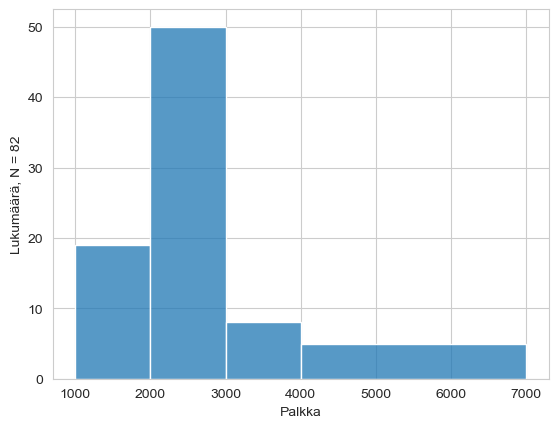

In [6]:
# Käytän histogrammissa edellä määriteltyjä luokkarajoja
sns.histplot(df['palkka'], bins=bins)

# Havaintojen lukumäärä
n = df['palkka'].count()

plt.xlabel('Palkka')
plt.ylabel(f'Lukumäärä, N = {n}')

Text(0, 0.5, '%, N = 82')

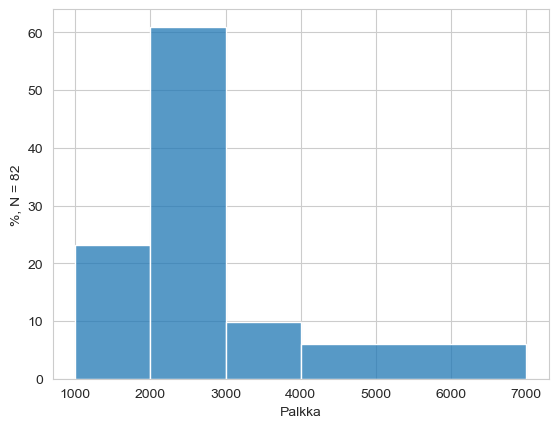

In [7]:
# Histogrammi, jossa y-akselilla prosentit
sns.histplot(df['palkka'], bins=bins, stat='percent')

# Havaintojen lukumäärä
n = df['palkka'].count()

plt.xlabel('Palkka')
plt.ylabel(f'%, N = {n}')

## Lisätietoa


* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
* https://seaborn.pydata.org/generated/seaborn.histplot.html
    
Data-analytiikka Pythonilla https://tilastoapu.wordpress.com/python/